<div class = "alert alert-warning" align="center"> 
    <img src="https://www.egd.mg/wp-content/uploads/2020/01/cropped-logo-home-110px.png" align="left" width="290"  margin="50px"> 
    <center><h1>Lycée français de Tananarive</h1> 
        <h2> Jupyter Hub,  Spécialité NSI </h2></center>
</div>

Parcours séquentiel de listes
======
Codage des algorithmes de parcours en Python
------


# Préambule
L'objectif de cette partie est de comprendre comment fonctionnent ces algorithmes de parcours, pour cela il conviendra de n'utiliser que des opérations de boucle (`while` ou `for`) et des opérations conditonnelles (`if`). **Il ne sera pas possible par de coder `if i in T` attention !!!**

# Algorithmes de vérification
## Test d'appartenance
> Ecrire une fonction `appartient(T,n)` qui teste l'appartenance de `n` à la liste `T`

**Attetntion vous n'avez pas le droit d'utiliser la strucuture `if i in T : return True`pour écrire votre fonction !**

Appuyer vous sur l'algorithme vu en cours avec une boucle `while..`

In [11]:
def appartient(T,n):
    return n in T
appartient([1,2,3],5)

False

In [12]:
def is_here(T, n):
    if T == []:
        return False
    cpt = 0
    x = T[cpt]

    while cpt < len(T):
        if T[cpt] == n:
            return True
        cpt += 1

def appartient(T, n):
    if is_here(T, n) == None:
        return False
    else:
        return True

In [13]:
assert appartient([1,2,3,4],5) == False
assert appartient([1,2,3,4],1) == True
assert appartient([1],1) == True
assert appartient([1],2) == False
assert appartient([1,3,4,5,8,2],2) == True

## Etude du coût en temps.
Nous allons maintenant étudier la complexité de cet algorithme. Pour pouvoir comparer les temps d'éxécution, nous allons étudier le cas le plus dévaforable en temps.

**A quelle condition l'algorithme précédemment écrit prend-il le plus de temps d'exécution ?**

**Comment cela se traduit-il dans la fonction `compte_temps(n)` définie ci dessous ?**

Dans une condition ou il y a le plus beaucoup d'élément, l'algorithme précédemment écrit prend le plus de temps possible

In [14]:
from time import process_time
from random import randint
    
def compte_temps(n):
    L = [randint(1,100) for i in range(n)]
    clef = 101
    t1_start = process_time()  
    appartient(L,clef)
    t1_stop = process_time() 
    return (t1_stop-t1_start)

In [15]:
import matplotlib.pyplot as plt

x = [i for i in range(0,100000,5000)]
y = []
for i in x :
    y.append(compte_temps(i))
plt.plot(x,y)

## Comparaison du coût en temps d'opérations élémentaires.
Considérons la fonction `appartient2(T,n)` définie ci dessous, 

In [16]:
def appartient2(T,n): 
    for i in range(len(T)) :
        if T[i] == n :
            return True
    return False
    
def compte_temps2(n):
    L = [randint(1,100) for i in range(n)]
    clef = 101
    t1_start = process_time()  
    appartient2(L,clef)  
    t1_stop = process_time() 
    return (t1_stop-t1_start)

Et comparons maintenant l'exécution des deux fonctions :

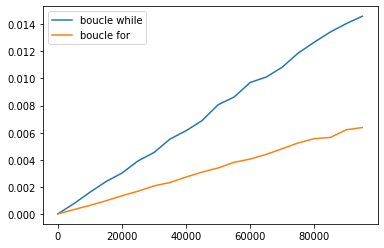

In [17]:
x = [i for i in range(0,100000,5000)]
y1,y2 = [],[]
for i in x :
    y1.append(compte_temps(i))
    y2.append(compte_temps2(i))
plt.plot(x,y1,label='boucle while')
plt.plot(x,y2,label='boucle for')
plt.legend()

**Proposer une explication à la différence de temps observé entre les deux mises en oeuvre de l'algorithme d'appartenance d'une valeur à un tableau**

La différence de temps observée entre les deux mises en oeuvre de l'algorithme d'appartenance d'une valeur à un tableau peut s'expliquer par le fait que la boucle "for" est plus lente que la boucle "while"

# Vérification de liste triée
## Fonction de vérification
> Ecrire une fonction `test_tri(T)` qui teste si un tableau d'entiers et trié par ordre croissant

In [18]:
def test_tri(T):
    cpt = 0
    tpc = 1
    while tpc < len(T):
        if T[cpt] > T[tpc]:
            return False
        cpt, tpc = cpt + 1, tpc + 1
    return True

In [19]:
assert test_tri([1,2,3,4,5,6]) == True
assert test_tri([1]) == True
assert test_tri([1,1,1,1]) == True
assert test_tri([4,3,2,1]) == False
assert test_tri([1,2,3,2,1]) == False

## Coût en temps
**On considére la fonction `compte_temps4(n)` définie ci-dessous, expliquer pourquoi cette fonction permet de trouver le coût maximal en temps de la fonction `test_tri(T)` ?**

La fonction compte_temps4(n) génère une liste L de longueur n, puis mesure le temps pris par la fonction test_tri(T) pour trier la liste L. Ainsi, plus la liste L est longue, plus le temps de tri de la fonction test_tri(T) sera long.
En traçant le graphique du temps de tri en fonction de la taille de la liste, on peut observer le coût maximal en temps de la fonction test_tri(T), c'est-à-dire le temps maximum que prendra la fonction test_tri(T) pour trier une liste de taille n. C'est pour cela que la fonction compte_temps4(n) permet de trouver le coût maximal en temps de la fonction test_tri(T).

In [20]:
def compte_temps4(n):
    L = [i for i in range(n)]
    t1_start = process_time()  
    test_tri(L) 
    t1_stop = process_time() 
    return (t1_stop-t1_start)

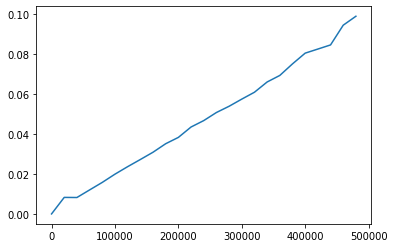

In [21]:
x = [i for i in range(0,500000,20000)]
y = []
for i in x :
    y.append(compte_temps4(i))
plt.plot(x,y)

**En déduire la compléxité de cette fonction de test de liste triée.**

Cette fonction permet de mesurer le temps d'exécution de la fonction test_tri(T) pour une liste triée de longueur n.......

**On peut également comparer le coût en temps avec une fonction intégrée au langage.**

In [22]:
def test_tri2(L) :
    if L==sorted(L) :
        return True
    else :
        return False

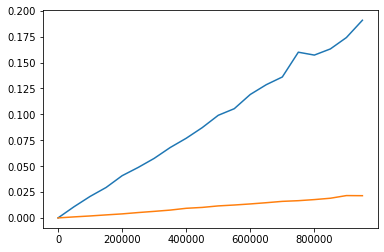

In [23]:
def compte_temps5(n):
    L = [i for i in range(n)]
    t1_start = process_time()  
    test_tri2(L) 
    t1_stop = process_time() 
    return (t1_stop-t1_start)

x = [i for i in range(0,1000000,50000)]
y1,y2 = [],[]
for i in x :
    y1.append(compte_temps4(i))
    y2.append(compte_temps5(i))
    
plt.plot(x,y1,label = 'boucle for')
plt.plot(x,y2,label = 'fonction sorted')

**On remarque que la fonction `sorted` est plus rapide, mais cela n'enléve rien à son coût linéaire**